# CP321-ILR: Assigment-8

In [1]:
%reload_ext autoreload
%autoreload 2

from utils.utils import fit_promp

# ProMP (Probablistic Movement Primitives)
theory:[paper](https://papers.nips.cc/paper/2013/file/e53a0a2978c28872a4505bdb51db06dc-Paper.pdf)

## Dataset "C"

### 1. GAS point

Does the system have a GAS (Global asymptotic Stable) point? Explain.

#### Plots

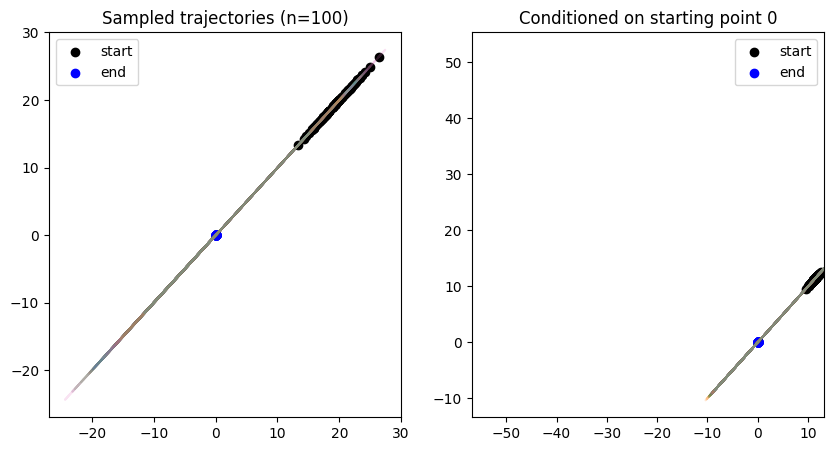

In [2]:
fit_promp(dataset="c")

#### Analysis

### 2. Different initial points

Try conditioning on different initial points.

#### Plots

### 3. Generalization of the algorithm

Try changing the `nweights_per_dim` parameter and comment on the generalization of the algorithm.

#### Plots

#### Analysis

## Dataset "J"

### 1. GAS point

Does the system have a GAS (Global asymptotic Stable) point? Explain.

#### Plots

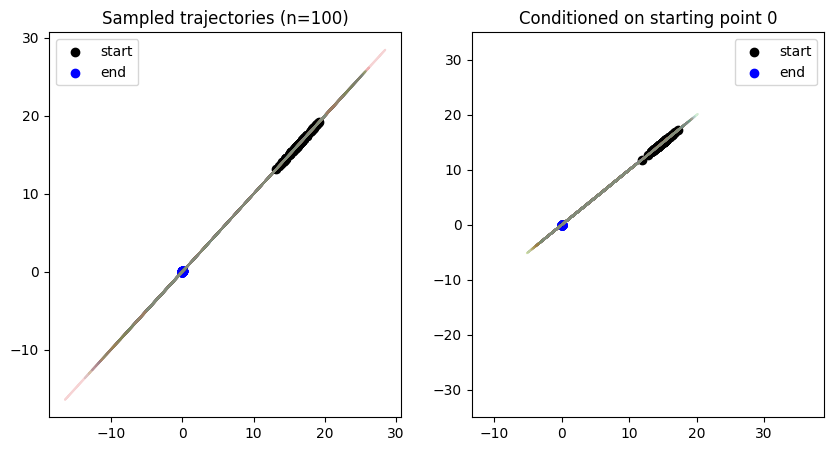

In [3]:
fit_promp(dataset="j")

#### Analysis

### 2. Different initial points

Try conditioning on different initial points.

#### Plots

### 3. Generalization of the algorithm

Try changing the `nweights_per_dim` parameter and comment on the generalization of the algorithm.

#### Plots

#### Analysis

## Dataset "S"

### 1. GAS point

Does the system have a GAS (Global asymptotic Stable) point? Explain.

#### Plots

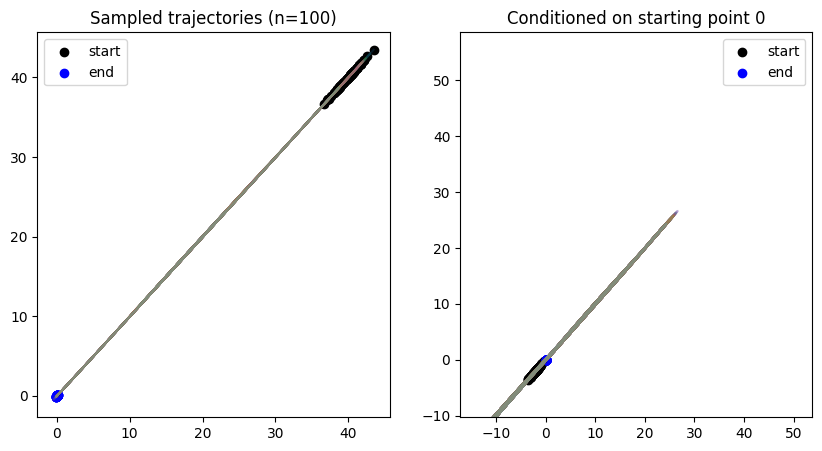

In [4]:
fit_promp(dataset="s")

#### Analysis

### 2. Different initial points

Try conditioning on different initial points.

#### Plots

### 3. Generalization of the algorithm

Try changing the `nweights_per_dim` parameter and comment on the generalization of the algorithm.

#### Plots

#### Analysis